In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix 
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
uploaded = files.upload() #upload the dataset to google colab

Saving covid-19-all.csv to covid-19-all.csv


In [0]:
data= pd.read_csv("/content/covid-19-all.csv")

In [0]:
data.head()

,Country,State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
0,China,Anhui,31.8257,117.2264,1.0,NaN,NaN,2020-01-22
1,China,Beijing,40.1824,116.4142,14.0,NaN,NaN,2020-01-22
2,China,Chongqing,30.0572,107.8740,6.0,NaN,NaN,2020-01-22
3,China,Fujian,26.0789,117.9874,1.0,NaN,NaN,2020-01-22
4,China,Gansu,36.0611,103.8343,NaN,NaN,NaN,2020-01-22


In [0]:
country ='Tunisia'
df = data[data['Country'] ==  country]

In [0]:
print("Les 5 premiers jours du covid-19 en Tunisie")
df.head()

Les 5 premiers jours du covid-19 en Tunisie


,Country,State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
3375,Tunisia,NaN,34.0000,9.0000,1.0,0.0,0.0,2020-03-04
3543,Tunisia,NaN,34.0000,9.0000,1.0,0.0,0.0,2020-03-05
3732,Tunisia,NaN,34.0000,9.0000,1.0,0.0,0.0,2020-03-06
3947,Tunisia,NaN,34.0000,9.0000,1.0,0.0,0.0,2020-03-07
4148,Tunisia,NaN,33.8869,9.5375,2.0,0.0,0.0,2020-03-08


In [0]:
print("Les 5 derniers jours du covid-19 en Tunisie")
df.tail()

Les 5 derniers jours du covid-19 en Tunisie


,Country,State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
45913,Tunisia,NaN,33.886917,9.537499,455.0,5.0,14.0,2020-04-02
48538,Tunisia,NaN,33.886917,9.537499,495.0,5.0,18.0,2020-04-03
51217,Tunisia,NaN,33.886917,9.537499,553.0,5.0,18.0,2020-04-04
53980,Tunisia,NaN,33.886917,9.537499,574.0,5.0,22.0,2020-04-05
56789,Tunisia,NaN,33.886917,9.537499,596.0,5.0,22.0,2020-04-06


In [0]:
d =  '2020-04-06'
covid = data[data['Date'] == d  ]
covid

,Country,State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
53995,US,South Carolina,34.223334,-82.461707,6.0,0.0,0.0,2020-04-06
53996,US,Louisiana,30.295065,-92.414197,79.0,0.0,2.0,2020-04-06
53997,US,Virginia,37.767072,-75.632346,11.0,0.0,0.0,2020-04-06
53998,US,Idaho,43.452658,-116.241552,402.0,0.0,3.0,2020-04-06
53999,US,Iowa,41.330756,-94.471059,1.0,0.0,0.0,2020-04-06
...,...,...,...,...,...,...,...,...
56799,West Bank and Gaza,NaN,31.952200,35.233200,254.0,24.0,1.0,2020-04-06
56800,Western Sahara,NaN,24.215500,-12.885800,4.0,0.0,0.0,2020-04-06
56801,Zambia,NaN,-13.133897,27.849332,39.0,5.0,1.0,2020-04-06
56802,Zimbabwe,NaN,-19.015438,29.154857,10.0,0.0,1.0,2020-04-06


In [0]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809 entries, 53995 to 56803
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    2809 non-null   object 
 1   State      2629 non-null   object 
 2   Latitude   2809 non-null   float64
 3   Longitude  2809 non-null   float64
 4   Confirmed  2809 non-null   float64
 5   Recovered  2809 non-null   float64
 6   Deaths     2809 non-null   float64
 7   Date       2809 non-null   object 
dtypes: float64(5), object(3)
memory usage: 197.5+ KB


In [0]:
covid.isnull().sum()

Country        0
State        180
Latitude       0
Longitude      0
Confirmed      0
Recovered      0
Deaths         0
Date           0
dtype: int64

In [0]:
copy = covid

In [0]:
 copy['Confirmed']= copy.groupby(['Country'] ).Confirmed.transform('sum')  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
 copy['Recovered']= copy.groupby(['Country'] ).Recovered.transform('sum')  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
 copy['Deaths']= copy.groupby(['Country'] ).Deaths.transform('sum')  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
copy=copy.drop_duplicates(subset ="Country",keep='first')

In [0]:
copy=copy.drop(['State','Date'],axis=1)

In [0]:
copy.head()

,Country,Latitude,Longitude,Confirmed,Recovered,Deaths
53995,US,34.223334,-82.461707,366614.0,19581.0,10783.0
56534,Canada,53.933300,-116.576500,16563.0,3256.0,339.0
56535,United Kingdom,18.220600,-63.068600,52279.0,287.0,5385.0
56536,China,31.825700,117.226400,82665.0,77310.0,3335.0
56537,Netherlands,12.521100,-69.968300,18926.0,258.0,1874.0


In [0]:
print("Analyse descriptive des donnees")
copy.describe()

Analyse descriptive des donnees


,Latitude,Longitude,Confirmed,Recovered,Deaths
count,182.000000,182.000000,182.000000,182.000000,182.000000
mean,19.653279,16.201479,7390.373626,1519.313187,409.697802
std,23.481940,58.597646,33072.766934,7422.352876,1941.352551
min,-40.900600,-116.576500,1.000000,0.000000,0.000000
25%,4.643279,-9.629825,24.000000,2.000000,1.000000
50%,17.858694,18.938650,340.000000,30.500000,5.500000
75%,40.124600,43.598693,1812.750000,130.750000,40.750000
max,64.963100,178.065000,366614.000000,77310.000000,16523.000000


Analyse graphique bidimentionnelle


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4778258b38>,
      dtype=object)

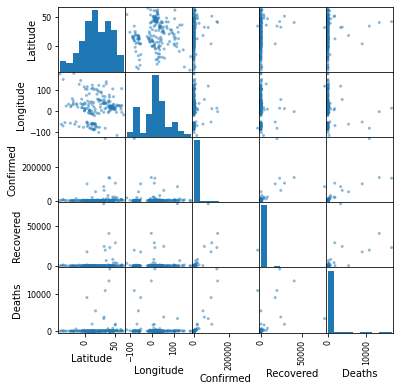

In [0]:
# analyse graphique bidimentionnelle
print("Analyse graphique bidimentionnelle")
scatter_matrix(copy,figsize=(6,6))

In [0]:
print('matrice de correlation')
copy.corr()

matrice de correlation


,Latitude,Longitude,Confirmed,Recovered,Deaths
Latitude,1.000000,0.030438,0.131521,0.133318,0.112082
Longitude,0.030438,1.000000,-0.119353,0.063317,-0.107059
Confirmed,0.131521,-0.119353,1.000000,0.602685,0.809719
Recovered,0.133318,0.063317,0.602685,1.000000,0.609879
Deaths,0.112082,-0.107059,0.809719,0.609879,1.000000


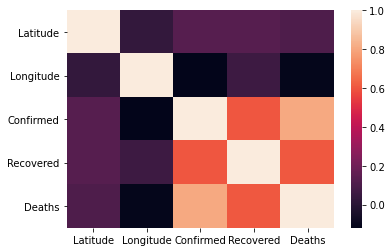

In [0]:
sns.heatmap(copy.corr(), 
            xticklabels=copy.corr().columns.values,
            yticklabels=copy.corr().columns.values)

In [0]:
print('matrice de covariance')
copy.cov()

matrice de covariance


,Latitude,Longitude,Confirmed,Recovered,Deaths
Latitude,551.401497,41.882606,1.021412e+05,2.323624e+04,5.109459e+03
Longitude,41.882606,3433.684159,-2.313049e+05,2.753850e+04,-1.217888e+04
Confirmed,102141.150850,-231304.909018,1.093808e+09,1.479457e+08,5.198873e+07
Recovered,23236.244292,27538.499226,1.479457e+08,5.509132e+07,8.787990e+06
Deaths,5109.459359,-12178.880742,5.198873e+07,8.787990e+06,3.768850e+06


In [0]:
# selection des variables quantitatives
x = copy.drop(['Country'],axis=1)
print(x)

        Latitude   Longitude  Confirmed  Recovered   Deaths
53995  34.223334  -82.461707   366614.0    19581.0  10783.0
56534  53.933300 -116.576500    16563.0     3256.0    339.0
56535  18.220600  -63.068600    52279.0      287.0   5385.0
56536  31.825700  117.226400    82665.0    77310.0   3335.0
56537  12.521100  -69.968300    18926.0      258.0   1874.0
...          ...         ...        ...        ...      ...
56798  14.058324  108.277199      245.0       95.0      0.0
56799  31.952200   35.233200      254.0       24.0      1.0
56800  24.215500  -12.885800        4.0        0.0      0.0
56801 -13.133897   27.849332       39.0        5.0      1.0
56802 -19.015438   29.154857       10.0        0.0      1.0

[182 rows x 5 columns]


In [0]:
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(x)

In [0]:
#Vérifions les propriétés du nouvel ensemble de données. 
#Les moyennes sont maintenant nulles
print(np.mean(Z,axis=0))
#Les écart-type sont unitaires.
print(np.std(Z,axis=0,ddof=0))

[-2.12284403e-16  1.95204048e-17 -1.95204048e-17  9.76020241e-18
  0.00000000e+00]
[1. 1. 1. 1. 1.]


In [0]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [0]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 5

5


In [0]:
n=x.shape[0]
p=x.shape[1]

In [0]:
#valeur Propre
eig_val = (n-1)/n*acp.explained_variance_
print(eig_val)

[2.39352085 1.05461844 0.9393423  0.42264097 0.18987743]


In [0]:
tot = sum(eig_val)
var_exp = [(i / tot)*100 for i in sorted(eig_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print()
print(pd.DataFrame({'Val.Propre':eig_val,'var_exp':var_exp,'cum_var_exp':cum_var_exp}))


   Val.Propre    var_exp  cum_var_exp
0    2.393521  47.870417    47.870417
1    1.054618  21.092369    68.962786
2    0.939342  18.786846    87.749632
3    0.422641   8.452819    96.202451
4    0.189877   3.797549   100.000000


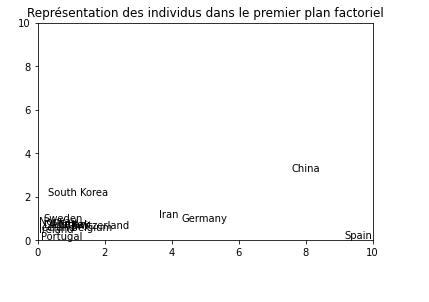

In [0]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots()
axes.set_xlim(0,10) #même limites en abscisse
axes.set_ylim(0,10) #et en ordonnée
#placement des étiquettes des observations
for i in range(copy.shape[0]):
 plt.annotate(copy.Country.values[i],xy=(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot(color='black',linestyle='-',linewidth=1)
plt.plot(color='black',linestyle='-',linewidth=1)
plt.title('Représentation des individus dans le premier plan factoriel')
#affichage
plt.show()


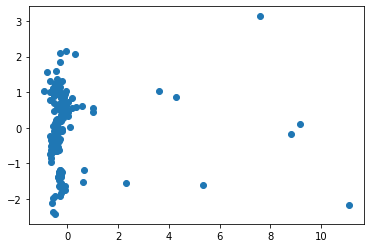

In [0]:
plt.scatter(x=coord[:,0],y=coord[:,1] )
plt.show()

In [0]:
#qualité de représentation des individus - COS2
cos2 = coord ** 2 / np.sum(Z**2,axis=0)
print(pd.DataFrame({'Country':copy.Country,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

                  Country    COS2_1    COS2_2
53995                  US  0.674757  0.026015
56534              Canada  0.002281  0.007756
56535      United Kingdom  0.029484  0.013350
56536               China  0.315199  0.053990
56537         Netherlands  0.002101  0.012770
...                   ...       ...       ...
56798             Vietnam  0.001365  0.008197
56799  West Bank and Gaza  0.000498  0.001578
56800      Western Sahara  0.000498  0.000569
56801              Zambia  0.001912  0.001439
56802            Zimbabwe  0.002184  0.002082

[182 rows x 3 columns]


In [0]:
#contributions aux axes
ctr =  coord ** 2 / (n*eig_val)
print(pd.DataFrame({'Country':copy.Country,'CTR_1':ctr[:,0]*100,'CTR_2':ctr[:,1]*100}))

                  Country      CTR_1     CTR_2
53995                  US  28.190969  2.466783
56534              Canada   0.095279  0.735477
56535      United Kingdom   1.231806  1.265822
56536               China  13.168848  5.119417
56537         Netherlands   0.087793  1.210894
...                   ...        ...       ...
56798             Vietnam   0.057009  0.777213
56799  West Bank and Gaza   0.020790  0.149631
56800      Western Sahara   0.020801  0.053953
56801              Zambia   0.079881  0.136422
56802            Zimbabwe   0.091243  0.197436

[182 rows x 3 columns]


#Analyse dual

In [0]:
#le champ components_ de l'objet ACP
#Les vecteurs propres
print(acp.components_)

[[ 0.15189212 -0.06872011  0.5901873   0.52495288  0.59017773]
 [ 0.48870115  0.84576581 -0.09138916  0.17202603 -0.08891825]
 [-0.85874135  0.47383118  0.04503278  0.1735711   0.07676222]
 [-0.01781369 -0.23525936 -0.3810948   0.81519946 -0.36681371]
 [-0.01859952  0.00973636  0.70431937  0.01242714 -0.70946392]]


In [0]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eig_val)

In [0]:
#corrélation des variables avec les axes
p= x.shape[1]
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)


[[ 0.23499242  0.50186977 -0.83228931 -0.01158083 -0.00810473]
 [-0.10631694  0.86855596  0.45923563 -0.1529441   0.00424261]
 [ 0.91307924 -0.09385175  0.04364562 -0.24775295  0.30690665]
 [ 0.81215502  0.17666147  0.16822454  0.52996804  0.00541512]
 [ 0.91306443 -0.09131426  0.07439769 -0.23846869 -0.30914839]]


In [0]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'columns':x.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

     columns     COR_1     COR_2
0   Latitude  0.234992  0.501870
1  Longitude -0.106317  0.868556
2  Confirmed  0.913079 -0.093852
3  Recovered  0.812155  0.176661
4     Deaths  0.913064 -0.091314


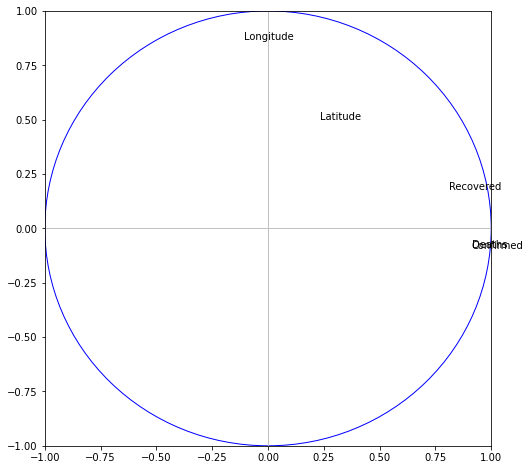

In [0]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(x.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()


In [0]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'columns':x.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

     columns    COS2_1    COS2_2
0   Latitude  0.055221  0.251873
1  Longitude  0.011303  0.754389
2  Confirmed  0.833714  0.008808
3  Recovered  0.659596  0.031209
4     Deaths  0.833687  0.008338


In [0]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eig_val[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'columns':x.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

     columns     CTR_1     CTR_2
0   Latitude  0.023071  0.238829
1  Longitude  0.004722  0.715320
2  Confirmed  0.348321  0.008352
3  Recovered  0.275576  0.029593
4     Deaths  0.348310  0.007906


#Analyse factorielle des correspondances AFC

In [0]:
!pip install fanalysis

     |████████████████████████████████| 61kB 2.0MB/s 


In [0]:
import pandas as pd
from fanalysis.ca import CA

In [0]:
df = pd.read_csv("/content/dataset.csv",delimiter=";", header=0, index_col=0, encoding="utf-8")

In [0]:
df.head()

,Ouvriers,Techniciens,Administratifs,Cadres su,Total
Age,,,,,
<30 ans,3,5,2,12,22
30;40,2,4,3,10,19
[40;50[,6,15,9,2,32
>=50,13,7,6,1,27
Total,24,31,20,25,100


In [0]:
my_ca = CA(row_labels=df.index.values, col_labels=df.columns.values)

In [0]:
X = df.values
X = X.astype(float)
X

array([[  3.,   5.,   2.,  12.,  22.],
       [  2.,   4.,   3.,  10.,  19.],
       [  6.,  15.,   9.,   2.,  32.],
       [ 13.,   7.,   6.,   1.,  27.],
       [ 24.,  31.,  20.,  25., 100.]])

In [0]:
#Tableau de contingence en fréquences 
print(X/100)

[[0.03 0.05 0.02 0.12 0.22]
 [0.02 0.04 0.03 0.1  0.19]
 [0.06 0.15 0.09 0.02 0.32]
 [0.13 0.07 0.06 0.01 0.27]
 [0.24 0.31 0.2  0.25 1.  ]]


In [0]:
Y = X
#Tableau de profils‐colonnes
for i in range(X.shape[0]) :
    for j in range(X.shape[1]):
      Y[i,j]=(X[i,j]*100) / X[4,j]

In [0]:
np.set_printoptions(precision=3)
Y

array([[ 12.5  ,  16.129,  10.   ,  48.   ,  22.   ],
       [  8.333,  12.903,  15.   ,  40.   ,  19.   ],
       [ 25.   ,  48.387,  45.   ,   8.   ,  32.   ],
       [ 54.167,  22.581,  30.   ,   4.   ,  27.   ],
       [100.   , 100.   , 100.   , 100.   , 100.   ]])

In [0]:
X = df.values
X = X.astype(float)
Z = X
#Tableau de profils‐lignes
for i in range(X.shape[0]) :
    for j in range(X.shape[1]):
      Z[i,j]=((X[i,j]*100) / X[i,4])

In [0]:
Z

array([[ 13.64,  22.73,   9.09,  54.55, 100.  ],
       [ 10.53,  21.05,  15.79,  52.63, 100.  ],
       [ 18.75,  46.88,  28.12,   6.25, 100.  ],
       [ 48.15,  25.93,  22.22,   3.7 , 100.  ],
       [ 24.  ,  31.  ,  20.  ,  25.  , 100.  ]])

In [0]:
#Tableau de fréquences théoriques 
X = df.values
X = X.astype(float)
Freq = X / 100
Fre = Freq
for i in range(X.shape[0]) :
    for j in range(X.shape[1]):
      Fre[i,j]= Freq[4,j] * Freq [i,4]
Fre

array([[0.053, 0.068, 0.044, 0.055, 0.22 ],
       [0.046, 0.059, 0.038, 0.048, 0.19 ],
       [0.077, 0.099, 0.064, 0.08 , 0.32 ],
       [0.065, 0.084, 0.054, 0.068, 0.27 ],
       [0.24 , 0.31 , 0.2  , 0.25 , 1.   ]])

In [0]:
my_ca.fit(X)

/usr/local/lib/python3.6/dist-packages/fanalysis/base.py:305: RuntimeWarning: invalid value encountered in true_divide
  .reshape(-1, 1)))
/usr/local/lib/python3.6/dist-packages/fanalysis/base.py:309: RuntimeWarning: invalid value encountered in true_divide
  .reshape(-1, 1))


CA(col_labels=array(['Ouvriers', 'Techniciens', 'Administratifs', 'Cadres su', 'Total'],
      dtype=object),
   n_components=None,
   row_labels=array(['<30 ans', '30;40', '[40;50[', '>=50', 'Total'], dtype=object),
   stats=True)

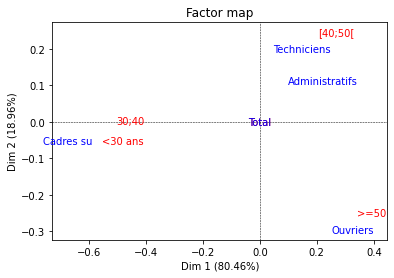

In [0]:
my_ca.mapping(num_x_axis=1, num_y_axis=2)